In [1]:
import mido
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import pretty_midi

# Full dataset

https://colinraffel.com/projects/lmd/#get

In [2]:
path_full = 'LAKH/lmd_full'
paths = []

directories = os.listdir(path_full)

#excluded = ['a','b','c','d','e','f']

for direc in directories:
    #if direc in excluded:
    directory = f"{path_full}/{direc}"
    midi_files = [name for name in os.listdir(directory) if name.endswith('.mid')]
    for midi in midi_files:
        paths.append(f"{path_full}/{direc}/{midi}")

In [3]:
len(paths)

178561

In [4]:
def search_melodies(path):
    
    has_melody = 0
    
    try:
        midi_data = pretty_midi.PrettyMIDI(path)
    except (OSError, IOError, EOFError) as e:
            #print(f"Warning: I/O error '{e}' encountered in {midi_file}. Skipping file.")
        return None  # Return None or handle this case as needed
    except Exception as e:
            #print(f"Warning: Error '{e}' encountered in {midi_file}. Skipping file.")
        return None
    
        
    midi_file = mido.MidiFile(path)
    
    # Check if track of Metadata exists
    track_names = [track.name for track in midi_file.tracks]
    if '' not in track_names:
        return None
        
    # Check if Melody track exists
    if 'MELODY'in track_names:
        
        for track in midi_file.tracks:
            
            #Check that it actually has notes
            if track.name=='MELODY':
                t = []
                for msg in track:
                    t.append(msg.time)
                if np.any(t!=0): 
                    has_melody = 1
                break
        
    return has_melody

In [5]:
melodies = []
corrupt = 0    

for i,path in enumerate(paths):
    if i%1000==0:
        print('Iteration: ', i, '  , n = ', len(melodies), '  melody tracks found')
    res = search_melodies(path)
    if res is not None:
        if res==1:
            melodies.append(path)
    else:
        corrupt += 1

Iteration:  0   , n =  0   melody tracks found


/home/sara/anaconda3/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Iteration:  1000   , n =  27   melody tracks found
Iteration:  2000   , n =  41   melody tracks found
Iteration:  3000   , n =  61   melody tracks found
Iteration:  4000   , n =  73   melody tracks found
Iteration:  5000   , n =  90   melody tracks found
Iteration:  6000   , n =  113   melody tracks found
Iteration:  7000   , n =  133   melody tracks found
Iteration:  8000   , n =  148   melody tracks found
Iteration:  9000   , n =  160   melody tracks found
Iteration:  10000   , n =  178   melody tracks found
Iteration:  11000   , n =  191   melody tracks found
Iteration:  12000   , n =  212   melody tracks found
Iteration:  13000   , n =  227   melody tracks found
Iteration:  14000   , n =  241   melody tracks found
Iteration:  15000   , n =  251   melody tracks found
Iteration:  16000   , n =  264   melody tracks found
Iteration:  17000   , n =  284   melody tracks found
Iteration:  18000   , n =  301   melody tracks found
Iteration:  19000   , n =  323   melody tracks found
Iterati

Iteration:  154000   , n =  2705   melody tracks found
Iteration:  155000   , n =  2728   melody tracks found
Iteration:  156000   , n =  2741   melody tracks found
Iteration:  157000   , n =  2760   melody tracks found
Iteration:  158000   , n =  2776   melody tracks found
Iteration:  159000   , n =  2795   melody tracks found
Iteration:  160000   , n =  2817   melody tracks found
Iteration:  161000   , n =  2833   melody tracks found
Iteration:  162000   , n =  2857   melody tracks found
Iteration:  163000   , n =  2879   melody tracks found
Iteration:  164000   , n =  2898   melody tracks found
Iteration:  165000   , n =  2920   melody tracks found
Iteration:  166000   , n =  2941   melody tracks found
Iteration:  167000   , n =  2949   melody tracks found
Iteration:  168000   , n =  2970   melody tracks found
Iteration:  169000   , n =  2991   melody tracks found
Iteration:  170000   , n =  3005   melody tracks found
Iteration:  171000   , n =  3016   melody tracks found
Iteration:

In [6]:
len(melodies)

3144

In [7]:
corrupt

69210

In [8]:
# Save melodies paths found
with open("melodies_clean.txt", "w") as f: 
    for line in melodies:
        f.write(f"{line}\n")

In [9]:
# Load melodies paths found
melodies_lakh = []
with open("melodies_clean.txt", "r") as f1:
    for line in f1:
        #line_as_list = line.strip()
        melodies_lakh.append(line.strip())
        

In [10]:
# Directory  to copy these files
target_directory = "/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0"

# Copy each file to the target directory
for file_path in melodies_lakh:
    if os.path.isfile(file_path):  # Check if the file exists
        shutil.copy(file_path, target_directory)
    else:
        print(f"File not found: {file_path}")

print("Files copied successfully.")

Files copied successfully.


# 2. Formatting dataset

In [15]:
# get data from new directory
paths = []

midi_files = os.listdir(target_directory)

for midi in midi_files:
    paths.append(f"{target_directory}/{midi}")

In [16]:
paths

['/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/ae7dd9d684995e893b6ed221d24415ab.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/67ed7a9265bb58bd14b01f9bb0e136e5.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/e5539676a5352bd25fc91ab3bbeac906.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/c80bed7709a11da91b58f734ae9dc41f.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/f749b3cffaee36441ff6f42bfb09e878.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/7869f30fe3267e976622d5e893b5106f.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/bb6a9c9eab870cd7acef927d186f14af.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks

### 2.1 Check for no-notes tracks and remove them

In [18]:
# check for tracks that don't have notes
path_toremove = []

for path in paths:

    # Open the MIDI file
    midi_file = mido.MidiFile(path)

    #compute total time
    t = 0
    for track in midi_file.tracks:
        if track.name=='MELODY':
            for msg in track:
                t = t + msg.time
            break
            
    if t==0:
        path_toremove.append(path)

In [19]:
path_toremove

['/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/661ac039ef0e720bb0190ce7c04cc895.mid',
 '/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/f7af9491b45a2be327e6913061a4e7e7.mid']

In [39]:
#Remove these tracks from the directory
for file_path in path_toremove:
    try:
        if os.path.exists(file_path):
            os.remove(file_path)
            print(f"Removed: {file_path}")
        else:
            print(f"File does not exist: {file_path}")
    except Exception as e:
        print(f"Error removing {file_path}: {e}")


Removed: /home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/661ac039ef0e720bb0190ce7c04cc895.mid
Removed: /home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_2.0/f7af9491b45a2be327e6913061a4e7e7.mid


### 2.2 Define metadata and check times

In [41]:
#Define new paths
paths_new = []
midi_files = os.listdir(target_directory)
for midi in midi_files:
    paths_new.append(f"{target_directory}/{midi}")

    
#creates list with metadata
#for each entry [ticks per beat, metamessage, total time in ticks]
#also check that there are no more tracks with no notes
metadata = []
path_toremove = []

for path in paths_new:

    # Open the MIDI file
    midi_file = mido.MidiFile(path)

    tpb = midi_file.ticks_per_beat

    track0 = [track for track in midi_file.tracks if track.name=='']
        
    #compute total time
    t = 0
    for track in midi_file.tracks:
        if track.name=='MELODY':
            for msg in track:
                t = t + msg.time
            break
            
    #get metamessage
    meta = [track0[0][i] for i in range(0,len(track0[0]))]
    if t!=0:
        metadata.append([tpb,meta,t])
    else:
        path_toremove.append(path)


In [42]:
path_toremove

[]

NICE!

In [43]:
len(paths_new)

3142

### 2.3 Select 4/4 tempo, 384 ticks per beat

In [44]:
# select 384 ticks per beat and 4/4 tempo
indexes_384_44 = []
selected_meta = []
selected_paths = []
for i in range(len(metadata)):
    if metadata[i][0] == 384:
        for msg in metadata[i][1]:
            if msg.type == 'time_signature' and msg.numerator == 4 and msg.denominator == 4:
                indexes_384_44.append(i)
                selected_paths.append(paths_new[i])
                selected_meta.append(metadata[i])
                break  # Exit the inner loop once a matching time_signature is found


In [45]:
len(indexes_384_44)

2699

In [46]:
times = []
for i in range(0, len(selected_meta)):
    if selected_meta[i][2]!=0:
        times.append(selected_meta[i][2])

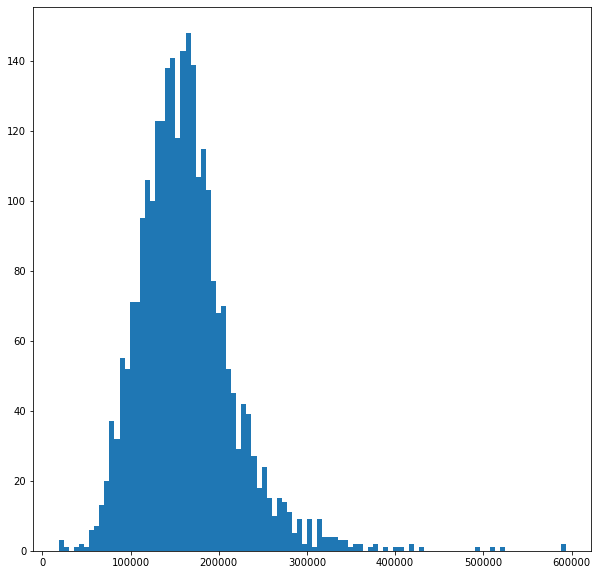

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
histo = plt.hist(times, bins=100)

In [48]:
# controllo se ha rimosso veramente le tracce che non hanno note
min(times)

18432

In [52]:
# define subset of the dataset with only these files:
target_directory = "/home/sara/Scrivania/Physics_of_Data/2nd_Year/NeuralNetworks_DeepLearning/Lab/Lakh_clean_4_4"

# Copy each file to the target directory
for file_path in selected_paths:
    if os.path.isfile(file_path):  # Check if the file exists
        shutil.copy(file_path, target_directory)
    else:
        print(f"File not found: {file_path}")

print("Files copied successfully.")

Files copied successfully.


 ### 2.4 Actual formatting

In [53]:
# Importinf files from dataset directory
# get data from new directory
paths_4_4 = []

midi_files = os.listdir(target_directory)

for midi in midi_files:
    paths_4_4.append(f"{target_directory}/{midi}")

In [54]:
len(paths_4_4)

2699

In [55]:
# Function to read MIDI file and extract note events in ticks
def extract_note_events(midi_file_path, track_name):
    midi_file = mido.MidiFile(midi_file_path)
    events = []
    current_time = 0

    for i, track in enumerate(midi_file.tracks):
        if track.name==track_name:
            for msg in track:
                current_time += msg.time
                if msg.type == 'note_on' and msg.velocity > 0:
                    events.append([int(current_time), int(msg.note), 1])   #1: note on
                elif msg.type == 'note_off' or (msg.type == 'note_on' and msg.velocity == 0):
                    events.append([int(current_time), int(msg.note), 0])  #0: note off
    return events,current_time



def unpack_notes(notes, max_time):
    """
    Unpacks note events into a continuous time series representation.

    Parameters:
    notes (ndarray): Array of note events with columns [time, note, event_type]
                     where event_type is 1 for 'note on' and 0 for 'note off'.
    max_time (int): The length of the output time series.

    Returns:
    ndarray: A time series array representing the notes.
    """
    notes_unpacked = np.zeros((max_time,))

    # If there is silence at the start
    if notes[0, 0] > 0:
        notes_unpacked[0:int(notes[0, 0])] = 0

    # Process each note event
    for i in range(notes.shape[0] - 1):
        start_time = int(notes[i, 0])
        end_time = int(notes[i + 0, 0])
        note = notes[i, 1]
        event_type = notes[i, 2]

        if event_type == 1:
            # Note on: fill every time tick with that note
            notes_unpacked[start_time:end_time] = note
        else:
            # Note off: silence until the next note
            notes_unpacked[start_time:end_time] = 0

    # Handle the last note event, extending to the end of the time series
    last_time = int(notes[-1, 0])
    if notes[-1, 2] == 1:
        notes_unpacked[last_time:] = notes[-1, 1]
    else:
        notes_unpacked[last_time:] = 0

    return notes_unpacked


from collections import Counter

def most_frequent(arr):
    # Count the frequency of each number in the array
    counter = Counter(arr)

    # Find the number with the highest frequency
    most_common = counter.most_common(1)

    # Return the most frequent number
    return most_common[0][0] if most_common else None


In [32]:
import glob
from mido import MidiFile

# Define the path to the folder, note lenght and final dataset list
#folder_path = "/home/gloria/Scrivania/Neural networks and deep learning/Project/flauto/data_midi_flauto"
midi_files = paths_4_4
note_length = 24  #24 is bar_length/64 (1536/64) so we have the minimum timestep perfectly filled by 1 semichrome
dataset = []

# defined looking at the dataset
bar_length = int(384*4)
notes_per_bar = bar_length/note_length  # w
minimum_notes_unpacked_shape = bar_length*8     # to have 8 bars 

# Use glob to find all MIDI files in the folder
#midi_files = glob.glob(f"{folder_path}/*.midi")
# Process each MIDI file
for iters,midi_file in enumerate(midi_files):

    # open a midi file
    mid = MidiFile(midi_file)

    # extract notes and time in ticks of the notes
    notes,max_time = extract_note_events(midi_file, track_name='MELODY')
    notes = np.array(notes)

    # unpacks notes into a continuous time series representation.
    notes_unpacked = unpack_notes(notes, max_time)
    notes_unpacked = notes_unpacked[:minimum_notes_unpacked_shape] # cut each note list to obtain same size for everyone

    # define #notes_per_bar
    #bar_length = int(384*4)
    #notes_per_bar = bar_length/note_length  # w
    #print(notes_per_bar)

    # create bars
    bars = []
    for j in range(0,(notes_unpacked.shape[0]-1),bar_length):
        bars.append(notes_unpacked[j:j+bar_length])

    n_bars = len(bars)
    note_bars = np.zeros((int(n_bars),int(notes_per_bar),128))
    note_bars_list = []

    for i in range(0,len(bars)):
        bar = bars[i]
        notes_list = []
        for t,j in enumerate(range(1,len(bar)-1,note_length)):
            timestep_bar = bar[j:j+note_length]
            note = most_frequent(timestep_bar)   #most frequent note in the timestep, ignoring silence

            notes_list.append(note)

            if note!=None :
                note_bars[i,t,int(note)] = 1  #assign one to the corresponding note
        note_bars_list.append(notes_list)
    dataset.append(note_bars)
    if iters%500==0:
        print(iters,'/',len(selected_paths),' midis processed successfully.\n')


0 / 2699  midis processed successfully.

500 / 2699  midis processed successfully.

1000 / 2699  midis processed successfully.

1500 / 2699  midis processed successfully.

2000 / 2699  midis processed successfully.

2500 / 2699  midis processed successfully.



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [56]:
dataset[0]

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.